<a href="https://colab.research.google.com/github/FarooqBaig/Emotion-Detection/blob/main/CKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [3]:
! gdown --id 1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh
To: /content/CKPlus1.zip
100% 112M/112M [00:00<00:00, 255MB/s]


In [4]:
!unzip 'CKPlus1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CKPlus/modified_images/surprise/surprise_0_9367.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9379.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_938.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9383.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9384.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9385.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9386.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9387.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9392.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9393.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9395.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9398.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9399.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_94.jpg  
  inflating: C

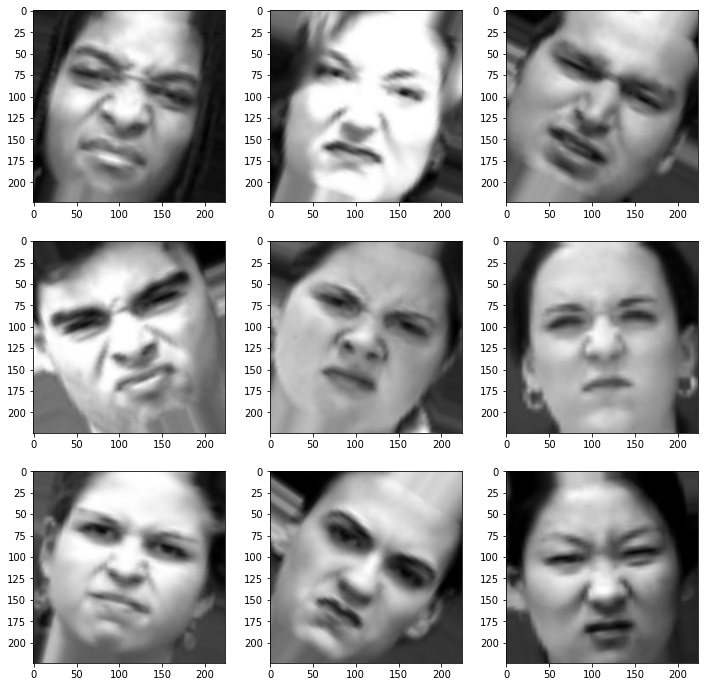

In [6]:
picture_size = 224
folder_path = "CKPlus/"
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [7]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 17365 images belonging to 7 classes.
Found 4707 images belonging to 7 classes.


In [11]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(224,224,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      640       
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)    

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
135/135 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.7833

135/135 [==============================] - 140s 975ms/step - loss: 0.5971 - accuracy: 0.7833 - val_loss: 4.5167 - val_accuracy: 0.3370 - lr: 0.0010
Epoch 2/48
135/135 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.9578

135/135 [==============================] - 128s 951ms/step - loss: 0.1313 - accuracy: 0.9578 - val_loss: 0.5610 - val_accuracy: 0.8277 - lr: 0.0010
Epoch 3/48
135/135 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9806

135/135 [==============================] - 130s 962ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.8656 - val_accuracy: 0.7704 - lr: 0.0010
Epoch 4/48
135/135 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9881

135/135 [==============================] - 131s 969ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.1302 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 5/48
135/135 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9899

135/135 [==============================] - 131s 969ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.7532 - val_accuracy: 0.7763 - lr: 0.0010
Epoch 6/48
135/135 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9915

135/135 [==============================] - 131s 969ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.1607 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 7/48
135/135 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9903Restoring model weights from the end of the best epoch: 4.



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
135/135 [==============================] - 131s 968ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 2.0694 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 7: early stopping


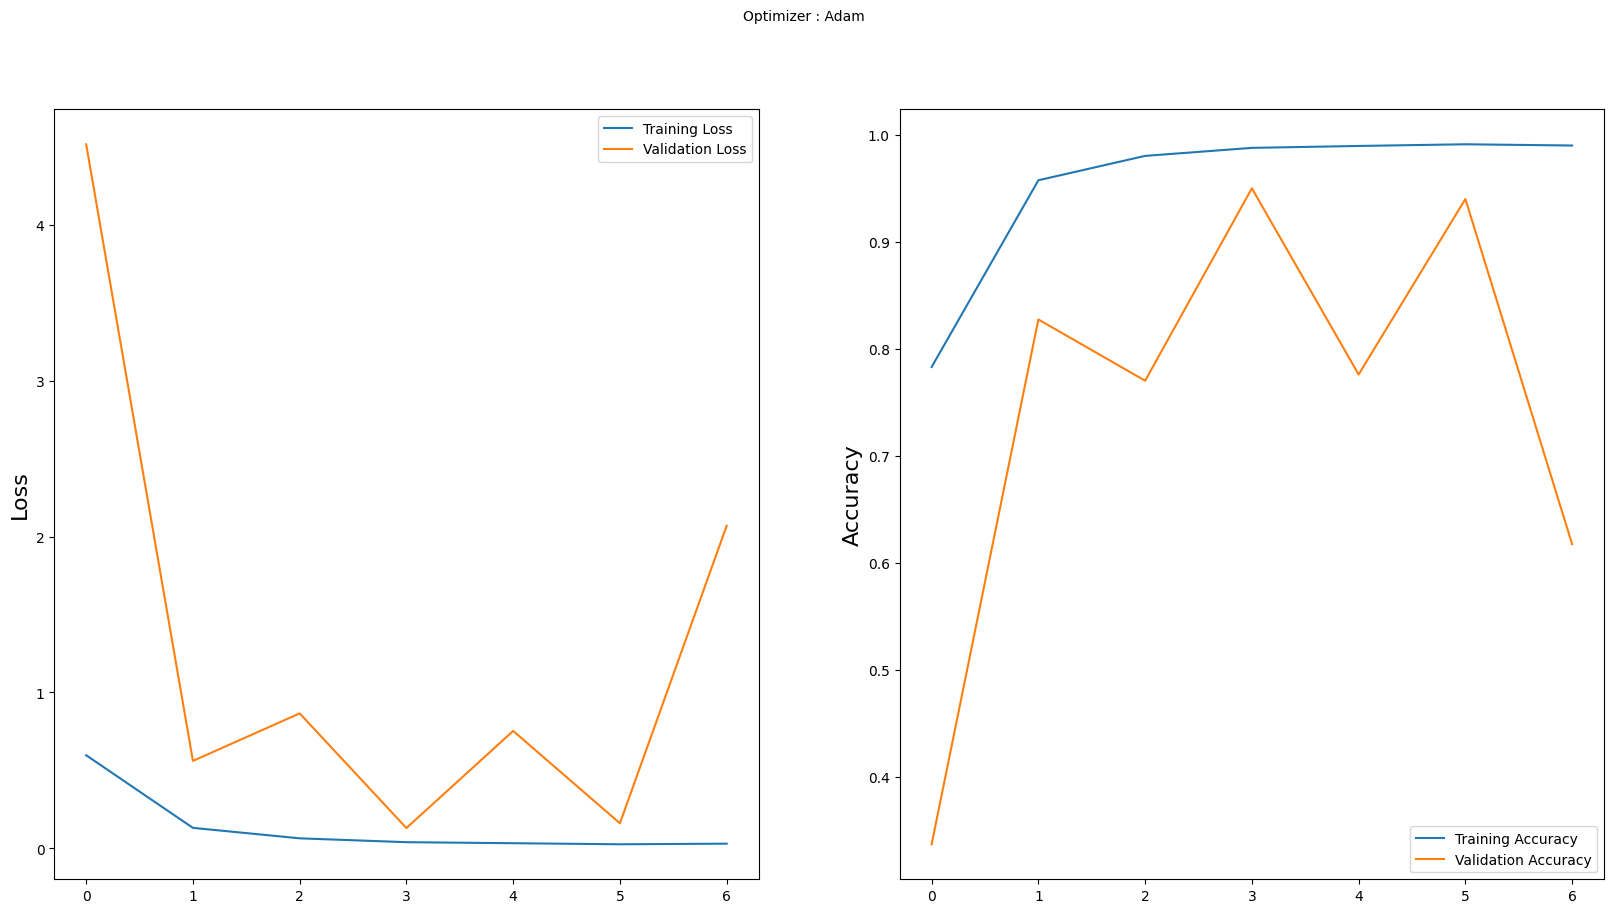

In [15]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
model.save('CKN.h5')

In [17]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [18]:
!cp CKN.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/' 

total 681056
-rw------- 1 root root 347978248 Nov 18 01:22  CKN.h5
-rw------- 1 root root 347978248 Nov 17 09:35  accurate_model.h5
drwx------ 2 root root      4096 Nov 15 11:25 'Colab Notebooks'
-rw------- 1 root root    843462 May 29 18:34 'Quotes Creator'
-rw------- 1 root root    595208 May 29 18:22  quote.jpg
